In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup

In [35]:
main_df = pd.read_csv('reviews.csv')

In [12]:
main_df.sample(20)

,review_id,product_id,review_title,review_body,sentiment
40798,2971940,B000SAAPG6,Secure enough to admit I dig it!,It seems to be incredibly hip for Kiss fans to...,Positive
25786,3483461,B009JBZH54,The Dark Knight Trilogy Rocks,I Loved all three of the Dark Knight movies ju...,Positive
21128,1196906,B00EW3STPY,Disappointed,"My girls love Caillou, but this app is not goo...",Negative
39312,583444,B004SHLE2Y,Fart,"It is amazing , I love it , has made my family...",Positive
19618,1286123,B00JQNG6FA,Fun graphics fun story great game,Another great chapter in the walking dead gami...,Positive
4272,465483,B0076ANLYY,great product,"best product for our ceramic stove top, been u...",Positive
15409,1032112,B00AOOPTGM,update,The update changed the look of the words and t...,Positive
3962,3548393,B00DW8E6K2,Amazingly fun! And it sustains interest throug...,Pure entertainment and fun! We love each episo...,Positive
42268,1417571,B001E27DLM,Revived from the Past...Chrono Trigger is Back,"To many of us that had this for the SNES, it w...",Positive
27712,476496,B00802U9UQ,"Fast, Easy, long expiration",I have ordered all my OTC meds from Amazon. Th...,Positive


In [13]:
main_df.isnull().sum()

review_id       0
product_id      0
review_title    0
review_body     9
sentiment       0
dtype: int64

In [15]:
main_df[main_df['review_body'].isnull()]

,review_id,product_id,review_title,review_body,sentiment
1472,3715222,B005HUVYBW,BUYER BEWARE: This food is seriously below th...,NaN,Negative
6312,3106557,B001NMT8FW,Trailer for Improvisation Toolkit Volume 1,NaN,Positive
14606,3381749,B005NFJAWG,The Wire: Complete Series,NaN,Positive
17753,3647837,B0010Y5G7W,Big Tuff Lobster,NaN,Positive
17925,130453,B009RXU59C,Slick Design,NaN,Positive
18988,3675719,B002CJIPEK,Dogs Love It!,NaN,Positive
24348,1745894,B000VK3TES,Impressed and disappointed all at the same time,NaN,Negative
26167,141888,B00AJHUNZ6,Makes your phone looks very cool,NaN,Positive
39286,187541,B00H99DB8S,"Great, stylish, portable power for your mobile...",NaN,Positive


In [37]:
main_df = main_df.fillna('')

### Combining title and body for review analysis

In [38]:
main_df['review'] = main_df['review_title']+' ' + main_df['review_body']

### html parser should be done during text cleaning/ pre-processing, but we do it here to better detect the language

In [6]:
main_df['review'] = main_df['review'].apply(lambda x: BeautifulSoup(x,'html.parser').text)

In [7]:
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

def get_lang_detector(nlp, name):
    return LanguageDetector()


nlp = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)

In [16]:
main_df['lang'] = main_df['review'].apply(lambda x: nlp(x)._.language)
main_df['pred_lang']=main_df['lang'].apply(lambda x: x['language'])

In [17]:
main_df['pred_lang'].value_counts()

en    49911
es       19
de       14
no       11
da        7
ca        6
af        6
fr        4
cy        4
so        4
nl        3
sv        2
sl        2
sk        2
id        2
it        1
hu        1
hr        1
Name: pred_lang, dtype: int64

#### Spanish Movie

In [20]:
main_df[main_df['pred_lang']=='es']

,review,lang,pred_lang
3387,Tremendo juego!! Muy bueno el video juego; exc...,"{'language': 'es', 'score': 0.9999977247708035}",es
7672,Comentario Sobre la Edicion En Dvd de La Que N...,"{'language': 'es', 'score': 0.9999948381747934}",es
9576,Lo que me faltaba! Todo es excelente.. el audi...,"{'language': 'es', 'score': 0.9999952152411015}",es
13305,Juego divertido Es un juego muy divertido que ...,"{'language': 'es', 'score': 0.9999970282354914}",es
14432,"Muy bien Me gusto el set deportivo, de buena c...","{'language': 'es', 'score': 0.9999972536168508}",es
23027,"Muy bien Muy bueno el cargador, una excelente ...","{'language': 'es', 'score': 0.9999978709238032}",es
26929,"Acción, emoción y reflexión intensa Third Watc...","{'language': 'es', 'score': 0.9999992132358138}",es
27376,Nunca recibi el producto No puedo evaluar el p...,"{'language': 'es', 'score': 0.9999966443666487}",es
28042,EXCELENTE Soy un fiel fanatico a LOS INTOCABLE...,"{'language': 'es', 'score': 0.9999956064305737}",es
28072,Eres mi destino ... Esta novela fue un regalo ...,"{'language': 'es', 'score': 0.9999970668217919}",es


In [49]:
main_df['review'][29524]

'Excelente! Versatil! Portatil! Excelente producto para la higiene personal. No jala los pelos como otros productos utilizados anteriormente y tampoco molesta la vibracion del equipo, por ende no produce cosquillas. 100/100'

### Translating to english

In [73]:
from deep_translator import GoogleTranslator
main_df['review'] = main_df.apply(lambda row: GoogleTranslator(source='auto', target='en').translate(row.review) 
                                           if row.pred_lang !='en' else row.review, axis=1)

In [74]:
main_df[main_df['pred_lang'] == 'es']

,review,lang,pred_lang
3387,tremendous game!! The video game is very good;...,"{'language': 'es', 'score': 0.9999977247708035}",es
7672,Comment on the DVD Edition of La Que No Podia ...,"{'language': 'es', 'score': 0.9999948381747934}",es
9576,What I was missing! Everything is excellent......,"{'language': 'es', 'score': 0.9999952152411015}",es
13305,Fun game It is a very fun game that makes you ...,"{'language': 'es', 'score': 0.9999970282354914}",es
14432,"Very good. I liked the sports set, of good qua...","{'language': 'es', 'score': 0.9999972536168508}",es
23027,"Very good Very good charger, an excellent idea...","{'language': 'es', 'score': 0.9999978709238032}",es
26929,"Action, emotion and intense reflection Third W...","{'language': 'es', 'score': 0.9999992132358138}",es
27376,I never received the product I cannot evaluate...,"{'language': 'es', 'score': 0.9999966443666487}",es
28042,EXCELLENT I am a loyal fan of THE UNTOUCHABLES...,"{'language': 'es', 'score': 0.9999956064305737}",es
28072,You are my destiny... This soap opera was a gi...,"{'language': 'es', 'score': 0.9999970668217919}",es


In [33]:
import re
import string

def clean_text(text):
    ''' 
    1) Remove html tag
    
    2) Remove punctuation
    
    3) Remove Stopwords
    
    4) Lemmatize 
    
    5) Remove numbers
    
    6) Remove 1-3 lettered words
    
    7) Only keep Noun and Adjective
    '''
    

    #remove html tag
    BeautifulSoup(text,'html.parser').text
    
    text = text.lower()
    #remove punctuation
    
    text = re.sub('[!"#\$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]',' ',text)

    
    
    
    #remove stopwords
    sentence = nlp(text)
    sentence   =' '.join([notStopWords.text for notStopWords in sentence if not notStopWords.is_stop])
    
    
    
    doc = nlp(sentence)
    
    #lemmatize

    sentence =" ".join([token.lemma_ for token in doc])
    
    
      
    #remove numbers
    
    sentence = re.sub(r'[0-9]', r'', sentence)
    
    # reduce multiple spaces and newlines to only one
    
    
    #remove 1-3 words
    sentence =  ' '.join([w for w in sentence.split() if len(w)>3])
    
    doc = nlp(sentence)
    
    #adjective and nouns only
    sentence = ' '.join([w.text for w in doc if (w.tag_ =='NN' or w.tag_ == 'NNS' or w.tag_ =='JJ')])
    
    

    return sentence

In [39]:
main_df['clean_review']=main_df['review'].apply(clean_text)

In [271]:
#main_df.to_csv('clean_text_segmentation.csv')

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

### Feature Engineering- Word of bags

In [42]:
# create a count vectorizer object
count_vect = CountVectorizer(token_pattern = r'\w{1,}',max_features=3000)

# Learn a vocabulary dictionary of all tokens in the raw documents
X_count = count_vect.fit_transform(main_df['clean_review'])

In [43]:
# Materialize the sparse data
data_dense = X_count.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  0.7040613333333333 %


### Finding the optimal number of topic for lda model

In [386]:
%%time

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# Options to try with our LDA
# Beware it will try *all* of the combinations, so it'll take ages
search_params = {
  'n_components': [5, 10, 15],
  'learning_decay': [.5, .7]
}

# Set up LDA with the options we'll keep static
model = LatentDirichletAllocation(learning_method='online')

# Try all of the options
gridsearch = GridSearchCV(model, param_grid=search_params, n_jobs=-1, verbose=1)
gridsearch.fit(X_count)

# What did we find?
print("Best Model's Params: ", gridsearch.best_params_)
print("Best Log Likelihood Score: ", gridsearch.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Model's Params:  {'learning_decay': 0.7, 'n_components': 5}
Best Log Likelihood Score:  -1925125.4451639403
Wall time: 12min 53s


In [373]:
%%time
# train a LDA Model
lda_model = LatentDirichletAllocation(n_components = 5, learning_method = 'online',n_jobs=-1,learning_decay=0.7)

X_topics = lda_model.fit_transform(X_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

Wall time: 1min 55s


C:\Users\65915\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


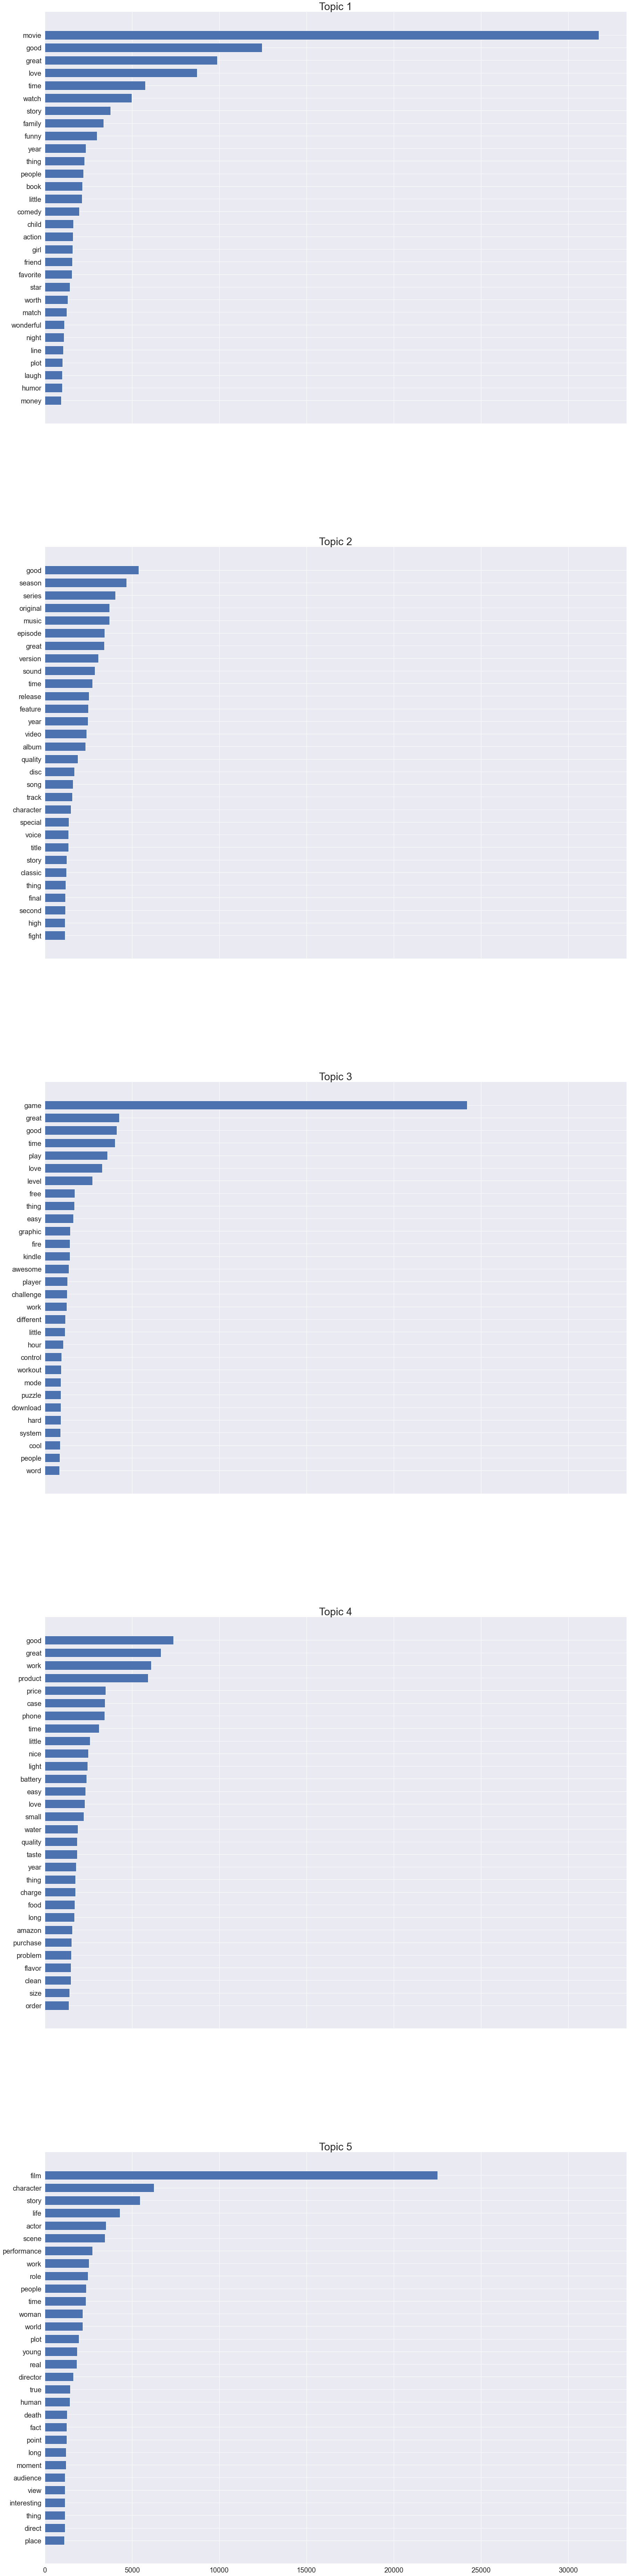

In [440]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(5, 1, figsize=(30, 120), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
#Show topics
n_top_words = 30
feature_names = count_vect.get_feature_names()
plot_top_words(lda_model, feature_names, n_top_words, '')

## Observation:
#### Topic 1: Excited and fun review for comedy and action movies
#### Topic 2: reviews for Songs and tv shows
#### Topic 3: reviews for challenging and fun games
#### Topic 4: reviews of Products purchase from online 
#### Topic 5: In-dept reviews on good film, review talk about the plots and their opinions


### Clustering reviews based on their topic probability distribution

In [377]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_topics)

### Finding optimal number of clusters using Elbow plot

In [378]:
max_cluster = 25
# ANSWER
ssd = []
for k in range(1,max_cluster+1):
    
    model = KMeans(k)
    model.fit(X_scaled)
    

    ssd.append(model.inertia_)

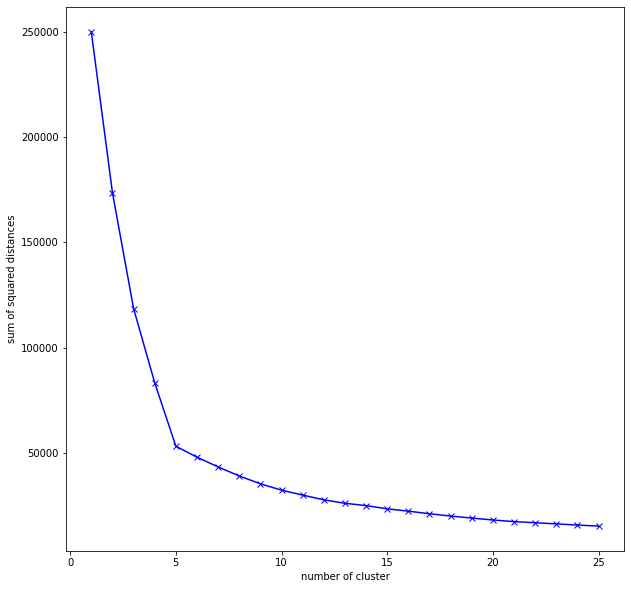

In [379]:
# ANSWER
plt.figure(figsize = (10,10))
plt.plot(np.arange(1,max_cluster+1),ssd,'bx-')
#plt.plot([4,4],[500,5*10**6],color = 'red')
plt.xlabel('number of cluster')
plt.ylabel('sum of squared distances')
plt.show()

### Optimal number is 5

In [388]:
model = KMeans(n_clusters=5)
model.fit(X_scaled)

KMeans(n_clusters=5)

In [389]:
num_topic =5
df_topic=pd.DataFrame(X_topics,columns=['Topic'+str(i+1) for i in range(num_topic)])
df_topic['cluster']=list(model.labels_)
df_topic

,Topic1,Topic2,Topic3,Topic4,Topic5,cluster
0,0.159625,0.011289,0.184098,0.037643,0.607345,3
1,0.009666,0.009597,0.826844,0.144283,0.009610,4
2,0.025539,0.025084,0.025344,0.898975,0.025058,0
3,0.018682,0.480387,0.364162,0.118491,0.018278,1
4,0.620567,0.022822,0.022504,0.311314,0.022793,2
...,...,...,...,...,...,...
49995,0.020232,0.020106,0.919224,0.020179,0.020259,4
49996,0.627946,0.015520,0.015511,0.015423,0.325600,2
49997,0.315175,0.293105,0.005314,0.005342,0.381065,3
49998,0.050163,0.050326,0.565336,0.284174,0.050000,4


### Check each cluster's general topic distrbution

In [417]:
cluster_summary=df_topic.groupby('cluster').mean()
cluster_summary

,Topic1,Topic2,Topic3,Topic4,Topic5
cluster,,,,,
0,0.053312,0.045618,0.066017,0.796237,0.038816
1,0.151574,0.562907,0.082992,0.074682,0.127846
2,0.645505,0.103374,0.055583,0.073838,0.121701
3,0.234171,0.151932,0.034568,0.050987,0.528343
4,0.070836,0.105818,0.671567,0.094085,0.057694


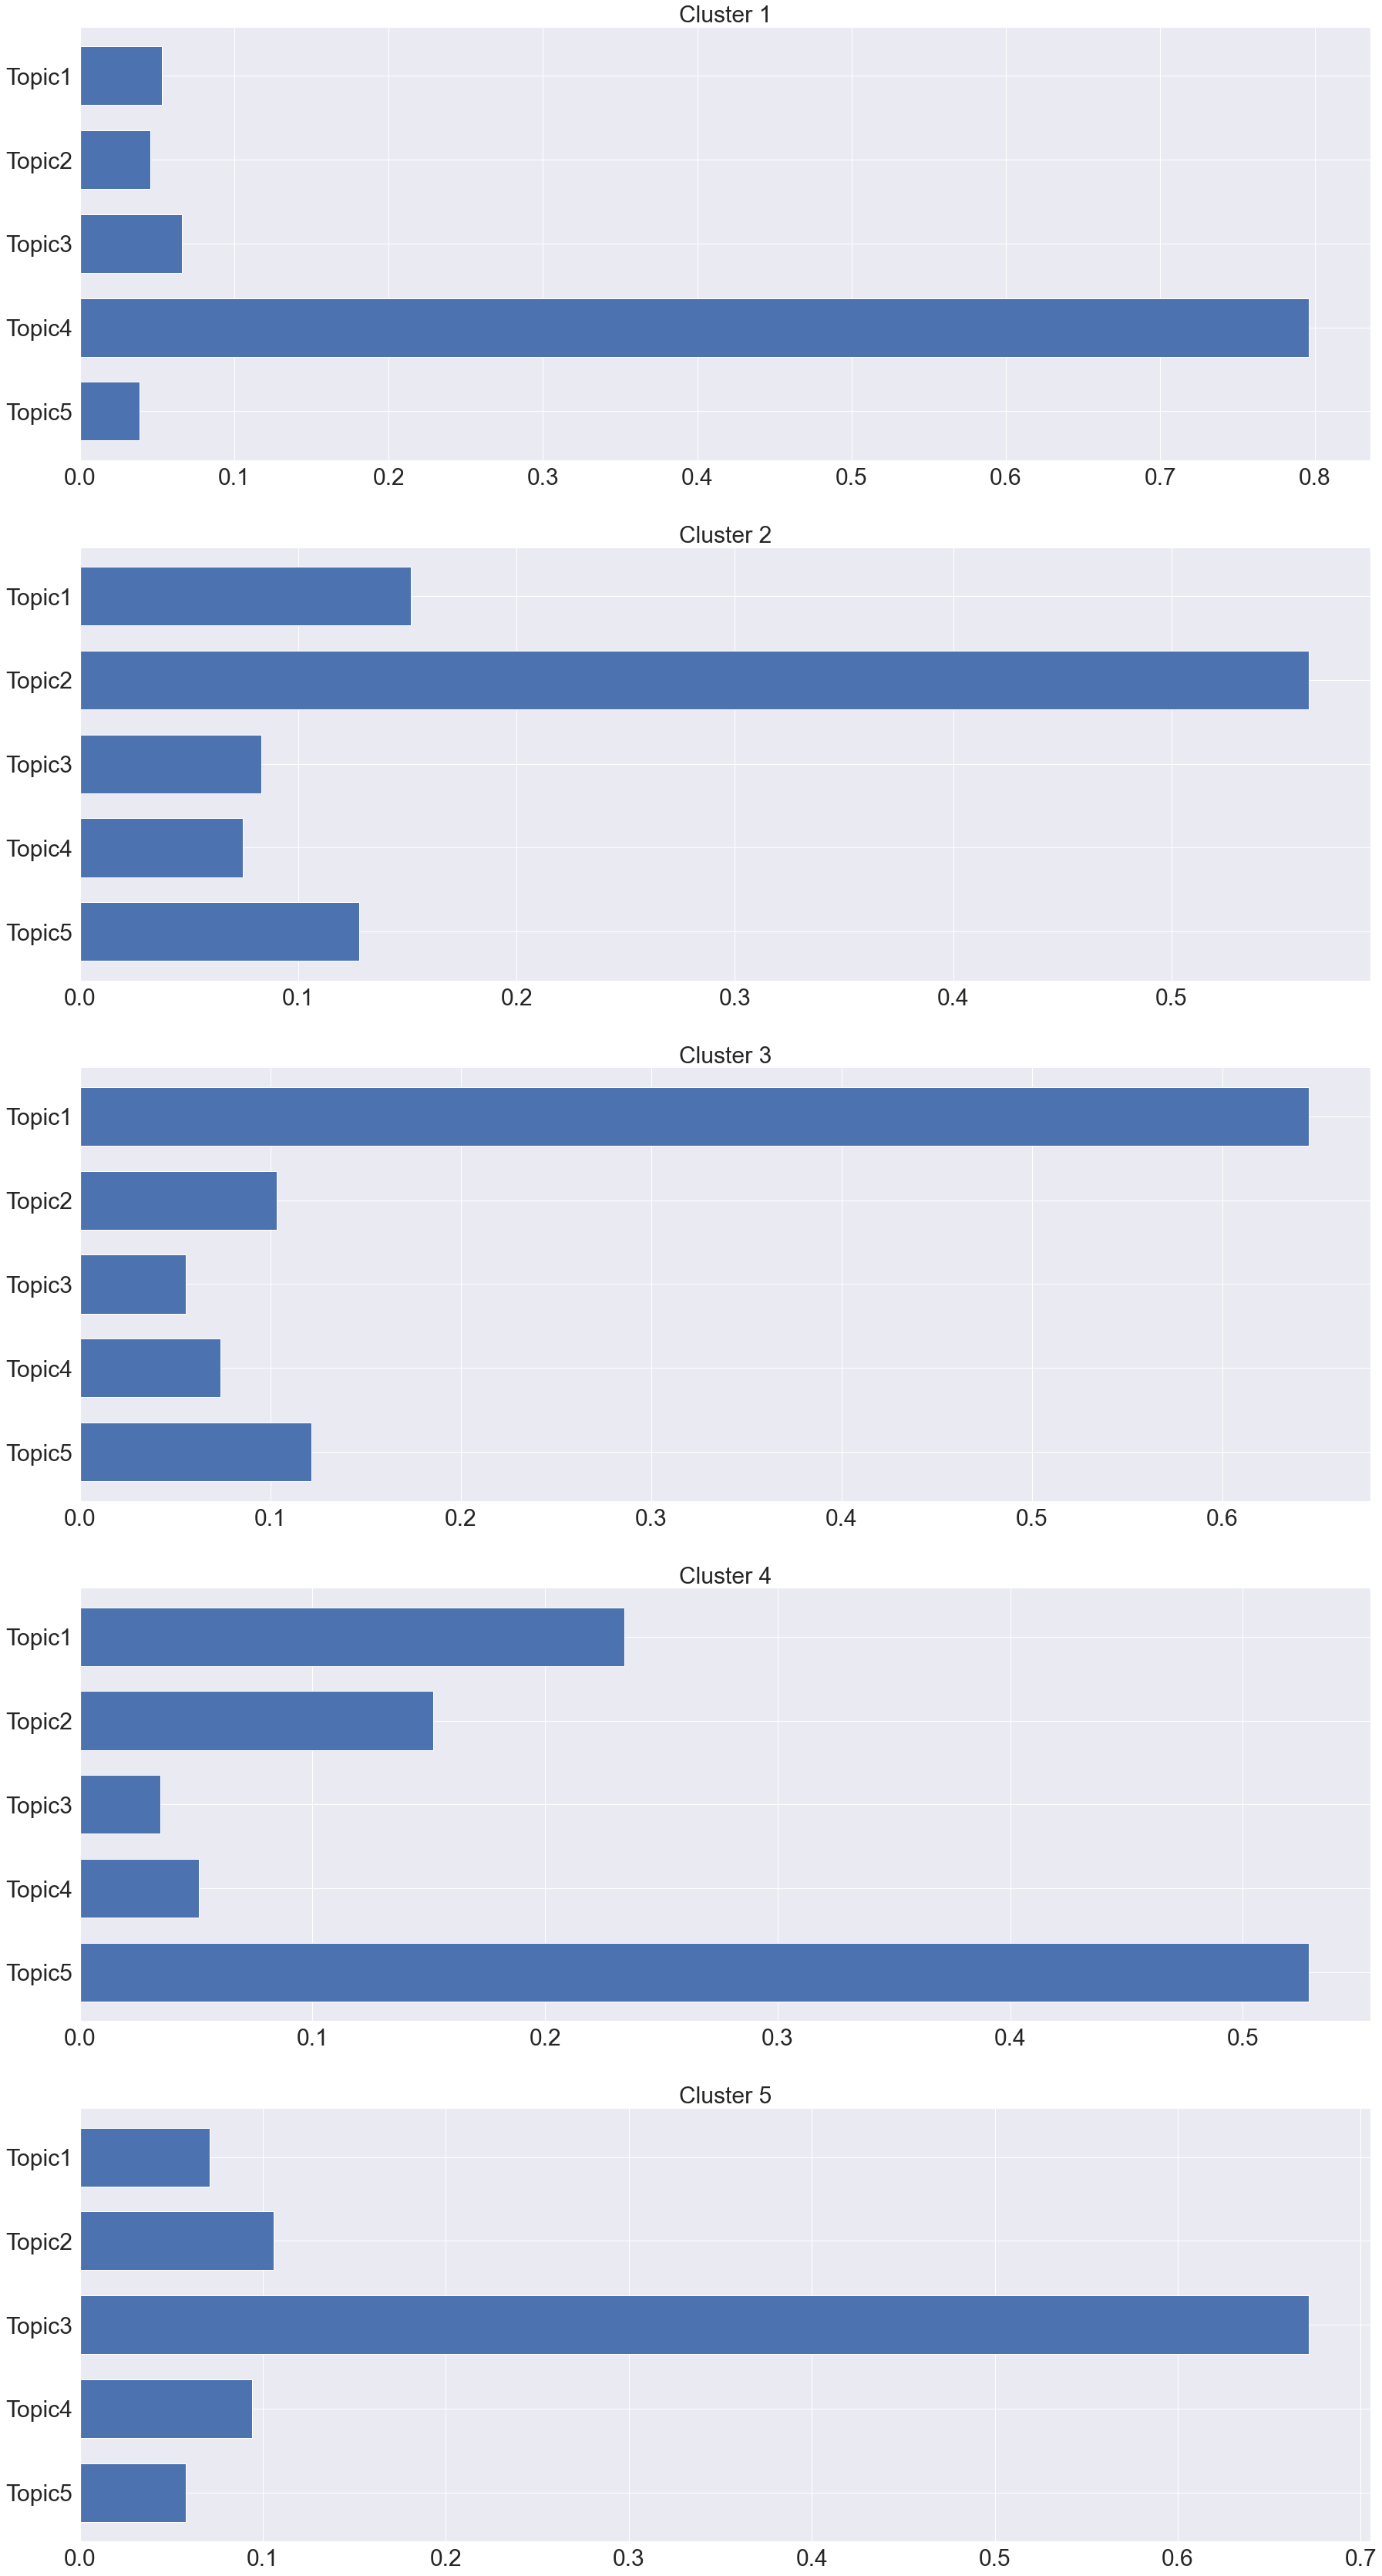

In [438]:
import seaborn as sns
fig, axes = plt.subplots(5, 1, figsize=(30, 60))

for i in range(5):
    cluster=cluster_summary.loc[i]
    
    
    ax = axes[i]
    ax.barh(cluster.index, cluster.values, height=0.7)
    ax.set_title(f'Cluster {i+1}',
                 fontdict={'fontsize': 30})
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=30)
    
    

### Cluster 1: Focus on Feedback and complain on Product purchased online
### Custer 2: feedback on songs or tv shows, consist of comedy and family friendly topic as well
### Cluster 3: Good feedback on movie reviews
### Cluster 4: Review on movie, focus on literature summary of the movie plot
### Cluster 5: Focus on gamers and their feedback on games

In [449]:
task1a = main_df[['review_id']]

### Answer for Task 1a!

In [452]:
task1a['product_category'] =[num+1 for num in list(model.labels_)]
task1a

<ipython-input-452-af7f67c49870>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task1a['product_category'] =[num+1 for num in list(model.labels_)]


,review_id,product_category
0,3227267,4
1,801848,5
2,3695888,1
3,1357666,2
4,1968126,3
...,...,...
49995,1132230,5
49996,2939710,3
49997,2468259,4
49998,1102407,5


In [459]:
task1a.to_csv('task1a.csv')